<a href="https://colab.research.google.com/github/GuCuChiara/Prediccion-de-evento-coronario-Framingham_CHD/blob/main/Framingham_CHD_Prediction_Arboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generación y validación de un modelo predictivo de riesgo cardiovascular:


# Framingham_CHD

* El **Framingham Heart Study** es un estudio epidemiológico longitudinal que comenzó en 1948 en la ciudad de Framingham, Massachusetts, y ha sido fundamental para la comprensión de las enfermedades cardiovasculares (ECV).

* El **Framingham CHD (Coronary Heart Disease) Dataset** es un subconjunto de datos de este estudio y se utiliza comúnmente en investigaciones médicas y proyectos de machine learning relacionados con la predicción del riesgo de enfermedad coronaria (CHD).

* Este dataset es popular para modelos de clasificación que predicen la probabilidad de desarrollar una enfermedad coronaria a lo largo de 10 años.



---



In [1]:
# montar carpeta google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




## Preprocesamiento en Google Colab:





---



## Importamos librerías:

In [2]:
# Importamos las librerías necesarias
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.target import FeatureCorrelation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc



---



## Cargamos el dataset:

In [3]:
# Cargamos el dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_preprocessed.csv")

##Estructura del Dataset
**Este dataset contiene una variedad de variables clínicas y de estilo de vida, como:**

* Edad **(age):** Edad de la persona.
* Sexo **(sex):** Género (generalmente codificado como 1 para hombres y 0 para mujeres).
* Cantidad de medicamentos que toma si tiene HTA **(BPMeds)**
* Presión Arterial **(sysBP y diaBP):** Presión arterial sistólica y diastólica.
* Colesterol Total **(totChol):** Nivel de colesterol total.
* Nivel de Glucosa **(glucose):** Nivel de glucosa en sangre.
* Fumador **(currentSmoker):** Indicador de si la persona es fumadora.
* Diabetes **(diabetes):** Indicador de si la persona tiene diabetes.
* Índice de Masa Corporal (IMC) **(BMI):** Una medida basada en la altura y el peso de la persona.
* Historia Familiar de ECV **(prevalentStroke y prevalentHyp):** Indicadores de si la persona tiene historia familiar de accidente cerebrovascular o hipertensión.
* Enfermedad Coronaria **(TenYearCHD):** Objetivo del dataset, que indica si la persona desarrolló una enfermedad coronaria en un periodo de 10 años.




---



In [4]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0




---



## Comprobarmos si hay valores faltantes en el conjunto de datos

In [ ]:
# Comprobarmos si hay valores faltantes en el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


##Evaluamos la variable objetivo para descubrir una posible asimetría en los datos.

[Text(0, 0, '3505')]

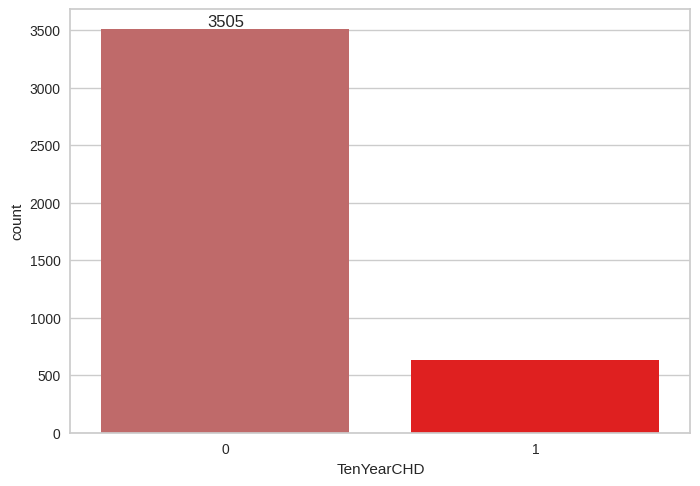

In [ ]:
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= df["TenYearCHD"], palette= cols)
ax.bar_label(ax.containers[0])

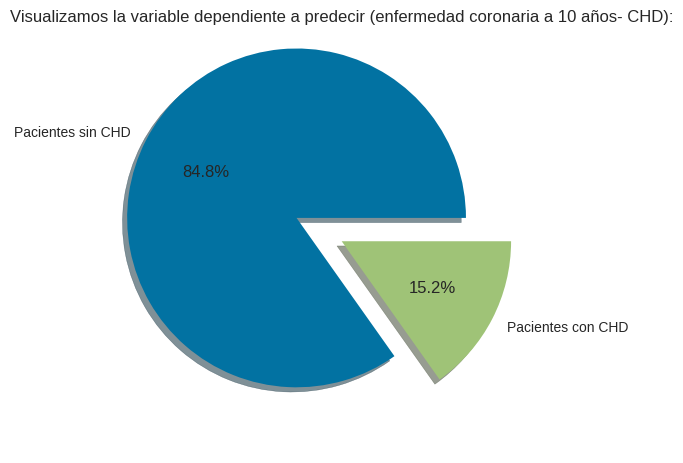

In [ ]:
plt.title("Visualizamos la variable dependiente a predecir (enfermedad coronaria a 10 años- CHD):")
plt.pie(np.array(df["TenYearCHD"].value_counts()),labels=['Pacientes sin CHD','Pacientes con CHD'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

### Estudiamos los valores de la columna target, "TenYearCHD"

In [ ]:
# Estudiamos los valores de la columna target, "TenYearCHD"
CHD_counts = df['TenYearCHD'].value_counts()

print("Hay un desequilibrio en el conjunto de datos, en favor del grupo de pacientes sin CHD:")
print(f"\nValores correspondientes a Pacientes sin CHD: {(CHD_counts[0])}")
print(f"\nValores correspondientes a Pacientes con CHD: {(CHD_counts[1])}")

Hay un desequilibrio en el conjunto de datos, en favor del grupo de pacientes sin CHD:

Valores correspondientes a Pacientes sin CHD: 3505

Valores correspondientes a Pacientes con CHD: 628




---



## Realizamos análisis univariado para la descripción estadística y la comprensión de la dispersión de datos:

In [ ]:
# Análisis univariado:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4133.0,0.427293,0.494745,0.00,0.00,0.00,1.00,1.0
age,4133.0,49.557222,8.561628,32.00,42.00,49.00,56.00,70.0
education,4133.0,0.280668,0.449380,0.00,0.00,0.00,1.00,1.0
currentSmoker,4133.0,0.494798,0.500033,0.00,0.00,0.00,1.00,1.0
cigsPerDay,4133.0,9.101621,11.918440,0.00,0.00,0.00,20.00,70.0
BPMeds,4133.0,0.034358,0.182168,0.00,0.00,0.00,0.00,1.0
prevalentStroke,4133.0,0.006049,0.077548,0.00,0.00,0.00,0.00,1.0
prevalentHyp,4133.0,0.311154,0.463022,0.00,0.00,0.00,1.00,1.0
diabetes,4133.0,0.025647,0.158100,0.00,0.00,0.00,0.00,1.0
totChol,4133.0,236.664408,43.909188,107.00,206.00,234.00,262.00,600.0




---



# Realizamos un análisis bivariado examinando una matriz de correlación de todas las características utilizando un heatmap:

<Axes: >

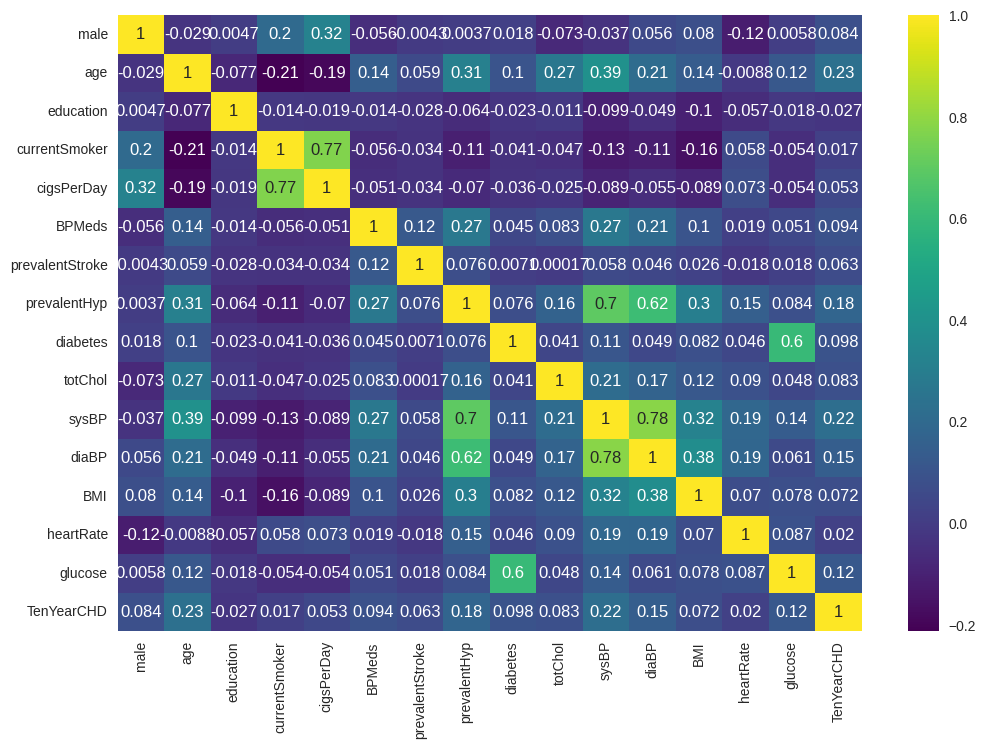

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<Axes: >

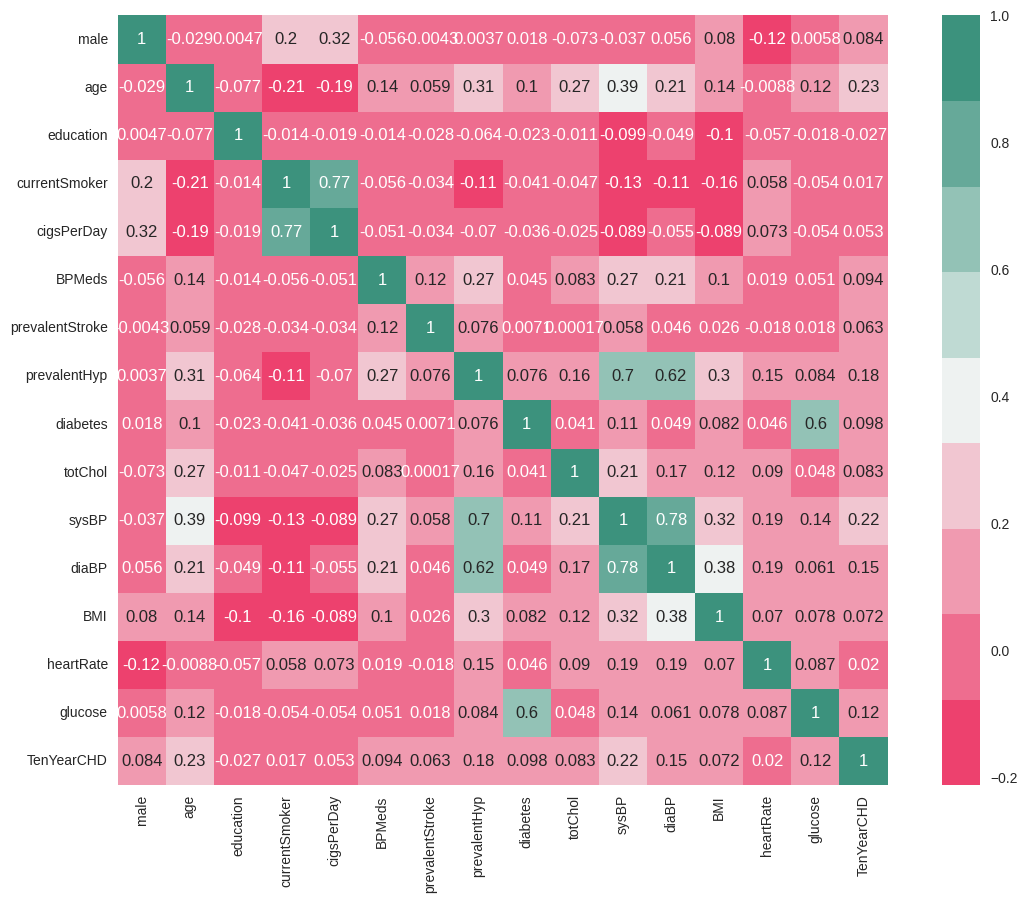

In [5]:
#Bivariate Analysis, by examaning a corelation matrix of all the features using heatmap
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = df.corr()
plt.subplots(figsize=(14,10))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)



---



## Evaluamos la distribución de la edad en nuestro Dataset

Text(0.5, 1.0, 'Distribution Of Edad')

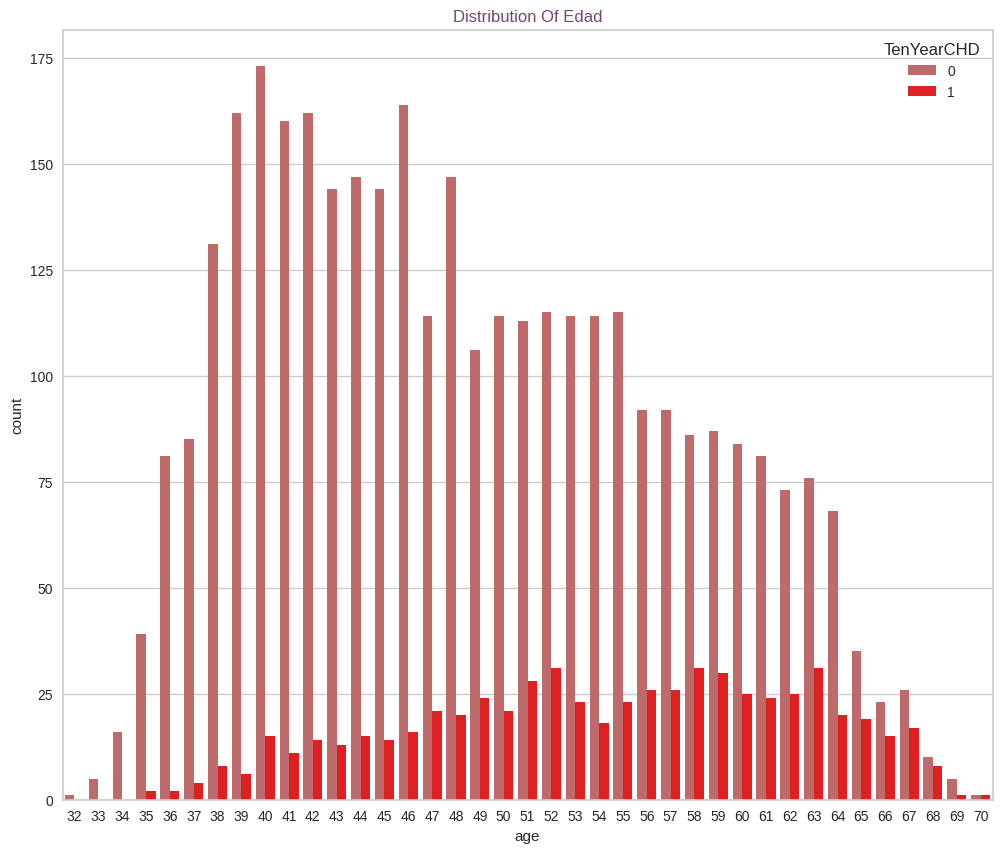

In [ ]:
#Evaluamos la distribución de la edad en nuestro Dataset
plt.figure(figsize=(12,10))
Days_of_week=sns.countplot(x=df['age'],data=df, hue ="TenYearCHD",palette = cols)
Days_of_week.set_title("Distribution Of Edad", color="#774571")



---



## Evaluamos la distribución del sexo en nuestro Dataset

Text(0.5, 1.0, 'Distribución del sexo (Sexo_Fem = 0)')

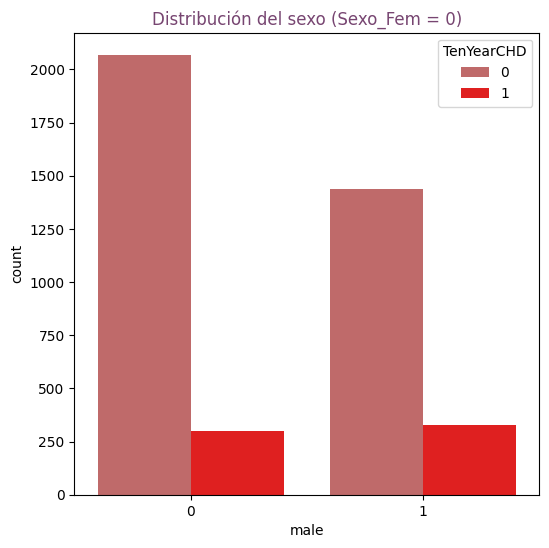

In [ ]:
#Evaluamos la distribución del sexo en nuestro Dataset
plt.figure(figsize=(6,6))
Days_of_week=sns.countplot(x=df['male'],data=df, hue ="TenYearCHD",palette = cols)
Days_of_week.set_title("Distribución del sexo (Sexo_Fem = 0)", color="#774571")



---



## 🩺 Modelo de predicción de riesgo de evento coronario usando Arboles de decisión: 🩺





---



###**Pasos hasta ahora:**
* Importamos las librerías necesarias.
* Exploramos la estructura del Dataset.
* Comprobamos valores faltantes.
* Observamos si hay asimetría o balance en el conjunto de datos.
* Realizamos análisis uni y bivariado de los datos.

###**Pasos Siguientes:**
* Seleccionamos las características (comorbilidades) y la variable objetivo (riesgo de enfermedad coronaria a 10 años).
* Escalamiento de datos
* Aplicamos submuestreo para equilibrar las clases
* Dividimos los datos balanceados en conjuntos de entrenamiento y prueba (70/30)
* Construimos un modelo de Arboles de decisión.
* Una vez seleccionado el tipo de modelo lo entrenamos.
* Generamos una representación visual del Arbol de decisión
* Evaluamos las métricas.



---



### Seleccionamos las características (comorbilidades) y la variable objetivo (riesgo de enfermedad coronaria a 10 años).

In [6]:
# Seleccionamos las características (comorbilidades) y la variable objetivo (riesgo de enfermedad coronaria a 10 años).
X = df[['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP','diaBP', 'currentSmoker', 'BPMeds']]

# Si decidimos tomar todas las variables dependientes:
# X = df.drop(["TenYearCHD"], axis=1)

y = df['TenYearCHD']

In [7]:
X.head()

,male,prevalentHyp,diabetes,totChol,prevalentStroke,BMI,sysBP,diaBP,currentSmoker,BPMeds
0,1,0,0,195.0,0,26.97,106.0,70.0,0,0.0
1,0,0,0,250.0,0,28.73,121.0,81.0,0,0.0
2,1,0,0,245.0,0,25.34,127.5,80.0,1,0.0
3,0,1,0,225.0,0,28.58,150.0,95.0,1,0.0
4,0,0,0,285.0,0,23.10,130.0,84.0,1,0.0




---



###Escalamiento de datos

In [8]:
# Escalamos los datos
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)

In [9]:
# Vemos como quedan nuestros datos escalados
# Acordarse si dps hacemos una predicción por consola o dataset previamente a la predicción: reescalar
X_scaled.head()

,male,prevalentHyp,diabetes,totChol,prevalentStroke,BMI,sysBP,diaBP,currentSmoker,BPMeds
0,1.157721,-0.672089,-0.162242,-0.948992,-0.078011,0.292457,-1.194286,-1.077067,-0.989649,-0.188627
1,-0.863766,-0.672089,-0.162242,0.303745,-0.078011,0.724478,-0.514866,-0.156658,-0.989649,-0.188627
2,1.157721,-0.672089,-0.162242,0.189860,-0.078011,-0.107655,-0.220451,-0.240331,1.010459,-0.188627
3,-0.863766,1.487898,-0.162242,-0.265681,-0.078011,0.687658,0.798679,1.014772,1.010459,-0.188627
4,-0.863766,-0.672089,-0.162242,1.100941,-0.078011,-0.657501,-0.107215,0.094363,1.010459,-0.188627




---



### Aplicamos submuestreo para equilibrar las clases

In [10]:
# Aplicamos un submuestreo para equilibrar las clases (nuestros datos están balanceados, ver arriba)
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=22)
X_balanced, y_balanced = undersample.fit_resample(X_scaled, y)
print("-"*100)
print("Ahora tenemos la misma cantidad de pacientes sin y con enfermedad coronaria a 10 años:")
print(y_balanced.value_counts())
print("-"*100)
print("El dataset total se redujo a:")
print(X_balanced.shape)
print(y_balanced.shape)
print("-"*100)

----------------------------------------------------------------------------------------------------
Ahora tenemos la misma cantidad de pacientes sin y con enfermedad coronaria a 10 años:
TenYearCHD
0    628
1    628
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
El dataset total se redujo a:
(1256, 10)
(1256,)
----------------------------------------------------------------------------------------------------


##IMPORTANTE:
###Training Set & Test Set & Overfitting
* **Overfitting** es cuando nos desempeñamos bien con los datos que el modelo ya ha visto, pero no nos desempeñamos bien con los datos nuevos.

* Para darle a un modelo una evaluación justa, nos gustaría saber qué tan bien se desempeñaría nuestro modelo con datos que aún no ha visto.
* Para simular la realización de predicciones sobre nuevos datos que el modelo no ha visto, podemos dividir nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba usando **train_test_split**
* Por lo tanto el set de datos de entrenamiento: (training set) es usado para construir el modelo.
* El set de datos de prueba (test set) será usado para evaluar el rendimiento de nuestro modelo.

### Dividimos los datos balanceados en conjuntos de entrenamiento y prueba (70/30)

In [12]:
# Dividimos los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.30, random_state=42, stratify=y_balanced)

# Podemos cambiar el tamaño de nuestro conjunto de entrenamiento usando el parámetro train_size.
# P.ej. train_test_split(X, y, train_size=0.6) colocaría el 60% de los datos en el conjunto de entrenamiento y el 40% en el conjunto de prueba.

# Atributo de .shape para ver los tamaños de nuestros conjuntos de datos
print("Dataset total inicial:", X.shape, y.shape)
# luego de resampleo:
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

Dataset total inicial: (4133, 10) (4133,)
training set: (879, 10) (879,)
test set: (377, 10) (377,)


In [13]:
# Visualizamos el dataset de entrenamiento
X_train.head()

,male,prevalentHyp,diabetes,totChol,prevalentStroke,BMI,sysBP,diaBP,currentSmoker,BPMeds
2917,-0.863766,-0.672089,-0.162242,-1.472863,-0.078011,-0.883331,-1.556643,-2.499517,1.010459,-0.188627
1900,1.157721,-0.672089,-0.162242,-0.607336,-0.078011,-0.034015,0.073964,0.094363,-0.989649,-0.188627
3540,-0.863766,1.487898,-0.162242,1.100941,-0.078011,-0.581406,2.927527,-0.909720,-0.989649,-0.188627
389,1.157721,-0.672089,-0.162242,-0.675667,-0.078011,0.260546,0.006022,-1.411761,1.010459,-0.188627
2734,1.157721,1.487898,-0.162242,-1.040100,-0.078011,1.330782,1.070446,0.680078,-0.989649,-0.188627




---



## Construimos un modelo de Arboles de decisión:

In [14]:
# Creamos un modelo de árbol de decisión

model = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)
#model = DecisionTreeClassifier(random_state=42, max_features=5)
#model = DecisionTreeClassifier(random_state=42, criterion='entropy')

### Entrenamos el modelo

In [15]:
# Entrenamos el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)



---



In [16]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



---



### Generamos una representación visual del Arbol de decisión:
* Los nodos muestran las condiciones de división, las muestras en cada nodo, las clases predichas y la impureza Gini (o cualquier otra medida de impureza utilizada).

In [18]:
from sklearn.tree import plot_tree
# Definimos las características seleccionadas para el entrenamiento
X = df[['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP', 'diaBP', 'currentSmoker','BPMeds']]

# Usamos a las columnas de X como feature_names
feature_names = X.columns

print(feature_names)

Index(['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI',
       'sysBP', 'diaBP', 'currentSmoker', 'BPMeds'],
      dtype='object')


[Text(0.5262493768693918, 0.9615384615384616, 'sysBP <= 0.199\ngini = 0.5\nsamples = 879\nvalue = [439, 440]\nclass = CHD'),
 Text(0.2189992522432702, 0.8846153846153846, 'totChol <= -0.755\ngini = 0.48\nsamples = 504\nvalue = [303, 201]\nclass = No CHD'),
 Text(0.372624314556331, 0.9230769230769231, 'True  '),
 Text(0.07976071784646062, 0.8076923076923077, 'totChol <= -1.188\ngini = 0.36\nsamples = 123\nvalue = [94, 29]\nclass = No CHD'),
 Text(0.05583250249252243, 0.7307692307692307, 'sysBP <= -0.436\ngini = 0.462\nsamples = 47\nvalue = [30, 17]\nclass = No CHD'),
 Text(0.03988035892323031, 0.6538461538461539, 'sysBP <= -0.583\ngini = 0.5\nsamples = 33\nvalue = [17, 16]\nclass = No CHD'),
 Text(0.031904287138584245, 0.5769230769230769, 'diaBP <= -1.391\ngini = 0.453\nsamples = 26\nvalue = [17, 9]\nclass = No CHD'),
 Text(0.015952143569292122, 0.5, 'totChol <= -1.621\ngini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = CHD'),
 Text(0.007976071784646061, 0.4230769230769231, 'gini = 0.32

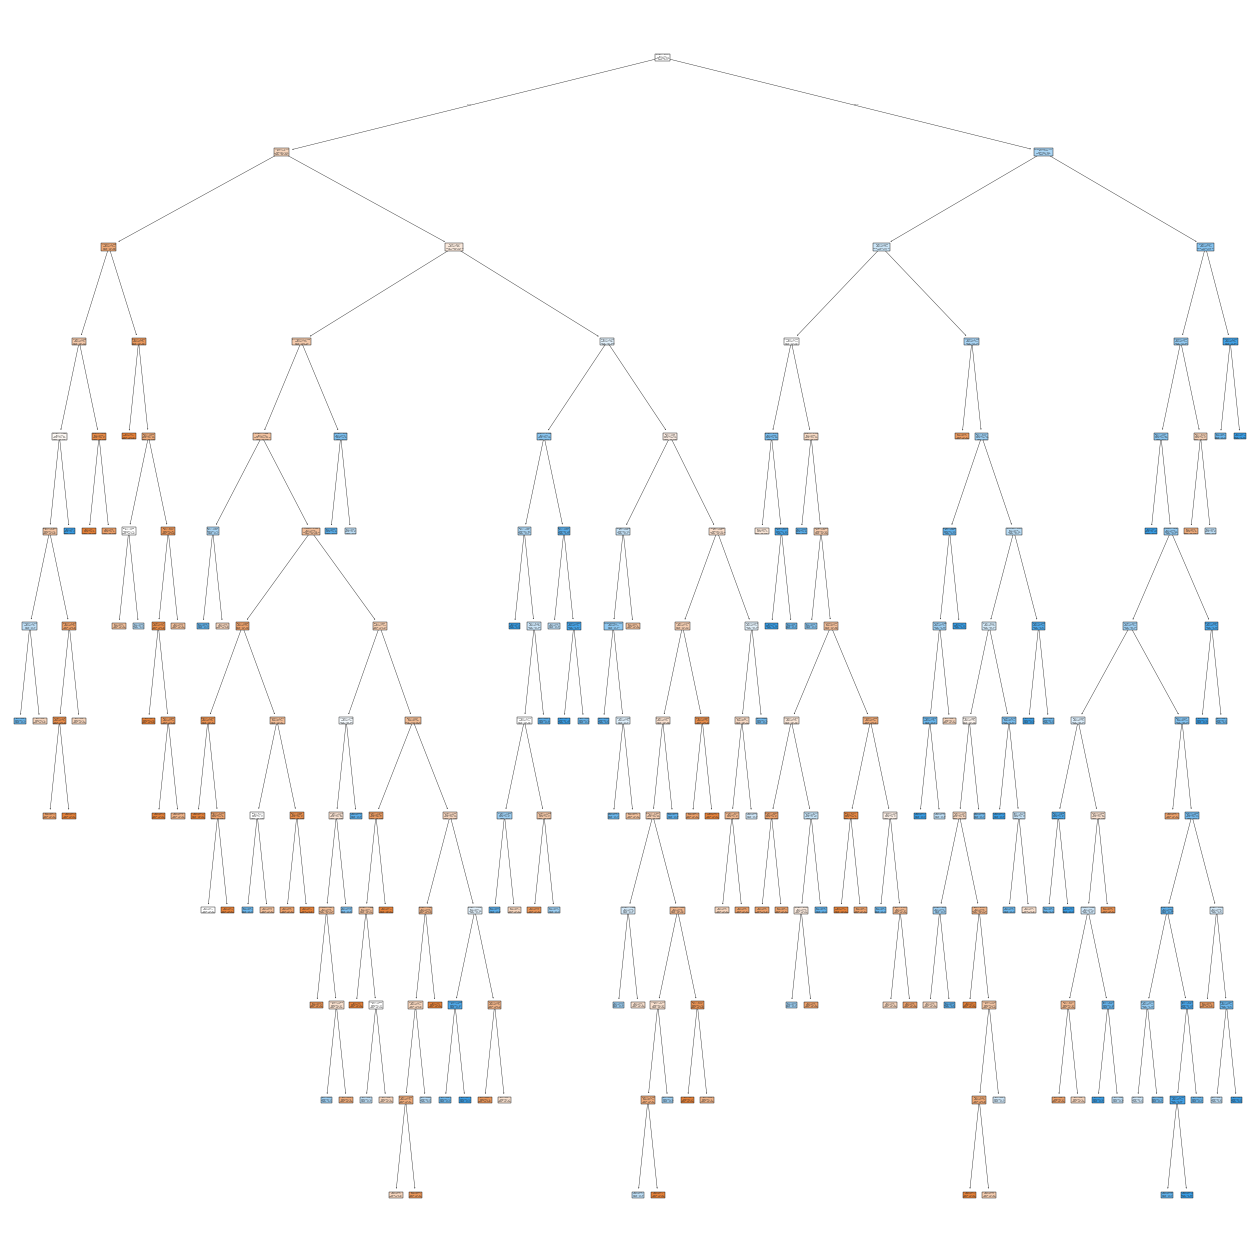

In [19]:
# Graficamos el árbol de decisión
plt.figure(figsize=(16,16))
plot_tree(model, feature_names=feature_names, class_names=["No CHD", "CHD"], filled=True)




---



##Evaluamos las métricas de rendimiento:

In [20]:
# Calculamos métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimimos las métricas de evaluación del modelo
print(f'El accuracy de nuestro modelo es {accuracy * 100:.2f}%')
print(f'La Precision de nuestro modelo es: {precision * 100:.2f}%')
print(f'El Recall de nuestro modelo es: {recall * 100:.2f}%')
print(f'El F1 Score de nuestro modelo: {f1 * 100:.2f}%')
print(f"El dataset de prueba cuenta con {len(y_test)} observaciones")
print('Matriz de confusión:')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

El accuracy de nuestro modelo es 57.03%
La Precision de nuestro modelo es: 57.22%
El Recall de nuestro modelo es: 54.79%
El F1 Score de nuestro modelo: 55.98%
El dataset de prueba cuenta con 377 observaciones
Matriz de confusión:
[[112  77]
 [ 85 103]]


## Calculamos y graficamos la matriz de confusión:

Confusion Matrix:
[[112  77]
 [ 85 103]]


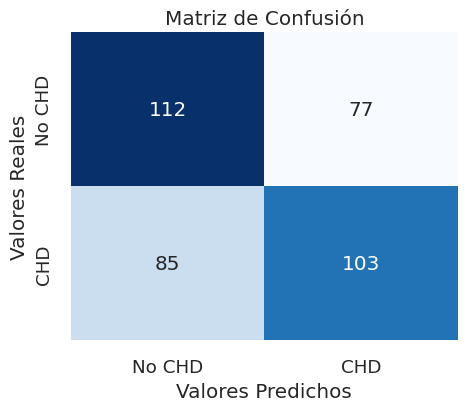

In [21]:
# Calculamos y mostramos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualizamos la matriz de confusión en un heatmap
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'], cbar=False)
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()



---



## Graficamos una curva ROC (Receiver Operating Characteristic): Nos muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación.

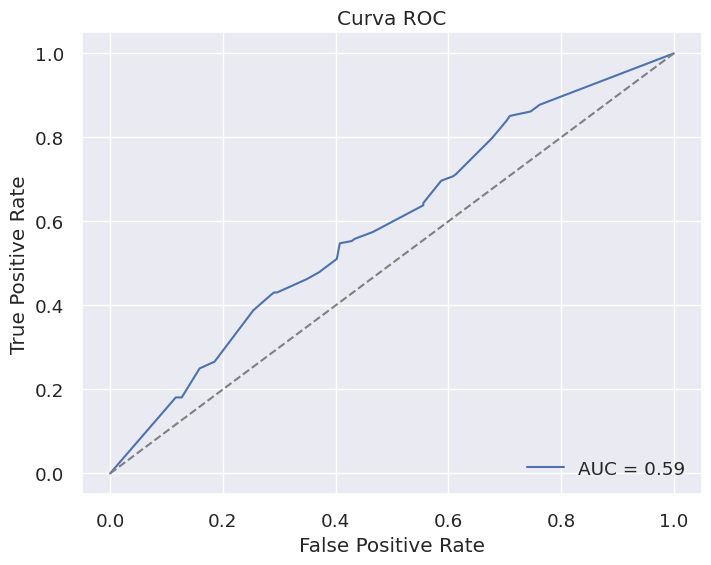

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculamos las probabilidades de clase para el conjunto de prueba
y_probs = model.predict_proba(X_test)[:, 1]

# Calculo de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculo del área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_probs)

# Graficamos la curva:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()




---



## Graficamos una Curva de precisión-recall, que nos muestra la relación entre la precisión y el recall para diferentes umbrales de clasificación.

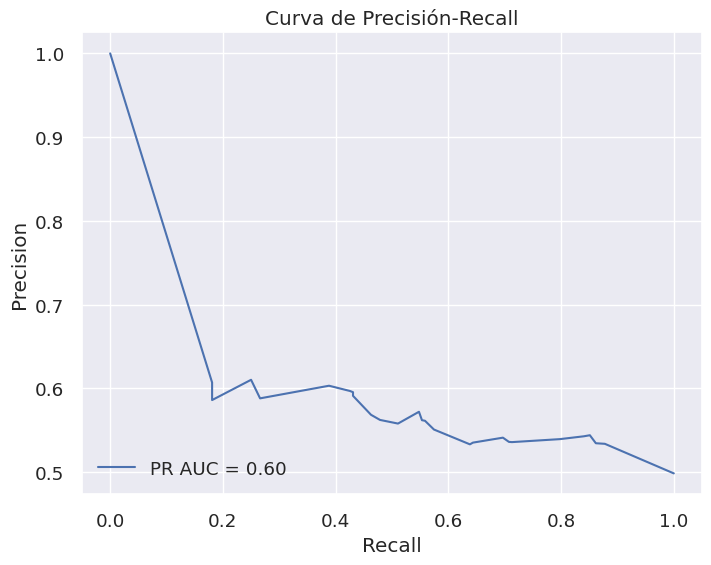

In [23]:
from sklearn.metrics import precision_recall_curve, auc

# Calculamos la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Calculamos el área bajo la curva de precisión-recall (AUC)
pr_auc = auc(recall, precision)

# Graficamos la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.legend(loc='lower left')
plt.show()




---





---



## Guardamos el modelo entrenado:

In [24]:
import joblib
# Guardamos el modelo entrenado en disco
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_decision_tree_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_decision_tree_model.pkl']

In [25]:
# Cargamos el modelo desde el archivo guardado
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_decision_tree_model.pkl')

In [26]:
# Leemos el nuevo conjunto de datos (Crear un nuevo dataset con casos: CHD_nuevos_casos.csv)
nuevo_caso = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_nuevos_casos.csv")
nuevo_caso_df= nuevo_caso[['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP','diaBP', 'currentSmoker','BPMeds']]

nuevo_caso_df.head()

,male,prevalentHyp,diabetes,totChol,prevalentStroke,BMI,sysBP,diaBP,currentSmoker,BPMeds
0,1,0,0,195.0,0,26.97,106.0,70.0,0,0.0
1,0,0,0,250.0,0,28.73,121.0,81.0,0,0.0
2,1,0,0,245.0,0,25.34,127.5,80.0,1,0.0
3,0,1,0,225.0,0,28.58,150.0,95.0,1,0.0
4,0,0,0,285.0,0,23.10,130.0,84.0,1,0.0


In [27]:
# Preprocesamos los datos usando la misma normalización que se aplicó en el conjunto de entrenamiento
nuevo_caso_scaled = s_scaler.transform(nuevo_caso_df)

# Realizamos predicciones con probabilidades usando el modelo cargado
probabilidades = model.predict_proba(nuevo_caso_scaled)

# Mostramos los resultados
for i, prob in enumerate(probabilidades):
    riesgo_porcentaje = prob[1] * 100  # Probabilidad de la clase 1 (TenYearCHD) como porcentaje
    pred_class = 1 if prob[1] > 0.5 else 0  # Clasificación binaria con umbral de 0.5
    print(f"Paciente {i+1}: Riesgo estimado de CHD a 10 años: {riesgo_porcentaje:.2f}% - Predicción binaria: {pred_class}")


Paciente 1: Riesgo estimado de CHD a 10 años: 0.00% - Predicción binaria: 0
Paciente 2: Riesgo estimado de CHD a 10 años: 0.00% - Predicción binaria: 0
Paciente 3: Riesgo estimado de CHD a 10 años: 85.71% - Predicción binaria: 1
Paciente 4: Riesgo estimado de CHD a 10 años: 57.14% - Predicción binaria: 1
Paciente 5: Riesgo estimado de CHD a 10 años: 75.00% - Predicción binaria: 1
Paciente 6: Riesgo estimado de CHD a 10 años: 77.78% - Predicción binaria: 1
Paciente 7: Riesgo estimado de CHD a 10 años: 44.44% - Predicción binaria: 0
Paciente 8: Riesgo estimado de CHD a 10 años: 83.33% - Predicción binaria: 1
Paciente 9: Riesgo estimado de CHD a 10 años: 0.00% - Predicción binaria: 0
Paciente 10: Riesgo estimado de CHD a 10 años: 16.67% - Predicción binaria: 0
Paciente 11: Riesgo estimado de CHD a 10 años: 75.00% - Predicción binaria: 1
Paciente 12: Riesgo estimado de CHD a 10 años: 42.86% - Predicción binaria: 0
Paciente 13: Riesgo estimado de CHD a 10 años: 100.00% - Predicción binaria:



---



##Llamamos al modelo entrenado para realizar una predicción por consola:

In [28]:
import pandas as pd
import numpy as np
import joblib

# Cargar el modelo entrenado
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_decision_tree_model.pkl')

#Obtenemos los datos del encabezado del dataset para crear el listado variables_paciente a partir de ENC
ENC_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_preprocessed.csv")
#ENC_df = ENC_df.drop(columns=['ID_paciente'])
ENC= ENC_df[['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP','diaBP', 'currentSmoker','BPMeds']]

# Obtenemos los nombres de las columnas del DataFrame ENC
variables_paciente = ENC.columns.tolist()

# Imprimir la lista de variables_paciente
print(variables_paciente)



['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP', 'diaBP', 'currentSmoker', 'BPMeds']


In [30]:
# Función para realizar la predicción
def predecir_chd(modelo, datos_paciente, scaler):
    # Convertimos los datos del paciente a un DataFrame
    paciente_df = pd.DataFrame(datos_paciente, index=[0])

    # Estandarizamos los datos del paciente con el mismo scaler usado durante el entrenamiento
    paciente_scaled = scaler.transform(paciente_df)

    # Realizamos la predicción de probabilidad
    pred_prob = modelo.predict_proba(paciente_scaled)[:, 1]  # Probabilidad de la clase positiva

    # Convertimos la probabilidad en clase binaria (0 o 1) con un umbral de 0.5
    pred_class = (pred_prob > 0.5).astype(int)

    # Imprimimos el resultado de la predicción binaria y el porcentaje de riesgo
    print("-" * 100)
    print(f"El riesgo estimado de enfermedad coronaria a 10 años es del: {pred_prob[0] * 100:.2f}%, predicción binaria: {pred_class[0]}, ", end="")

    # Interpreta la predicción binaria
    if pred_class[0] == 1:
        print("lo que significa que el paciente tiene un riesgo elevado de CHD.")
    else:
        print("lo que significa que el paciente tiene un bajo riesgo de CHD.")

# Variables del paciente (definir previamente las que estás utilizando)
variables_paciente = ['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP', 'diaBP', 'currentSmoker', 'BPMeds']

# Pedimos por consola al usuario que ingrese los valores de las variables del paciente
datos_paciente = {}
for variable in variables_paciente:
    if variable == 'male':
        while True:
            valor = input(f"Ingrese 'male' para masculino o 'female' para femenino: ").strip().lower()
            if valor in ['male', 'female']:
                datos_paciente[variable] = 1 if valor == 'male' else 0
                break
            else:
                print("Valor inválido. Por favor, ingrese 'male' o 'female'.")
    else:
        valor = input(f"Ingrese el valor (numérico o binario 0/1) de {variable}: ")
        datos_paciente[variable] = float(valor)

# Realizamos la predicción
predecir_chd(model, datos_paciente, s_scaler)


Ingrese 'male' para masculino o 'female' para femenino: male
Ingrese el valor (numérico o binario 0/1) de prevalentHyp: 1
Ingrese el valor (numérico o binario 0/1) de diabetes: 0
Ingrese el valor (numérico o binario 0/1) de totChol: 160
Ingrese el valor (numérico o binario 0/1) de prevalentStroke: 0
Ingrese el valor (numérico o binario 0/1) de BMI: 28
Ingrese el valor (numérico o binario 0/1) de sysBP: 145
Ingrese el valor (numérico o binario 0/1) de diaBP: 68
Ingrese el valor (numérico o binario 0/1) de currentSmoker: 1
Ingrese el valor (numérico o binario 0/1) de BPMeds: 2
----------------------------------------------------------------------------------------------------
El riesgo estimado de enfermedad coronaria a 10 años es del: 40.00%, predicción binaria: 0, lo que significa que el paciente tiene un bajo riesgo de CHD.




---

